In [14]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Representation 

In [15]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [16]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
56,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0
192,50.0,1,121,1,40,0,260000.00,0.70,130,1,0,175,0
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
161,45.0,1,130,0,35,0,174000.00,0.80,139,1,1,121,0
169,70.0,0,835,0,35,1,305000.00,0.80,133,0,0,145,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data wrangling

In [18]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df['serum_creatinine'].value_counts()

serum_creatinine
1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: count, dtype: int64

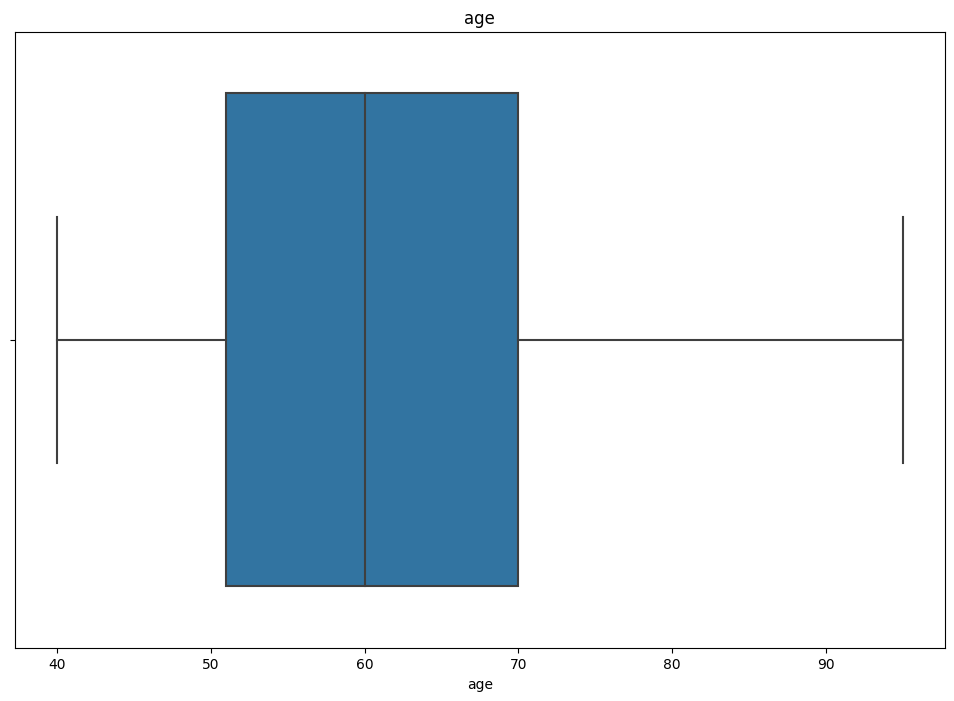

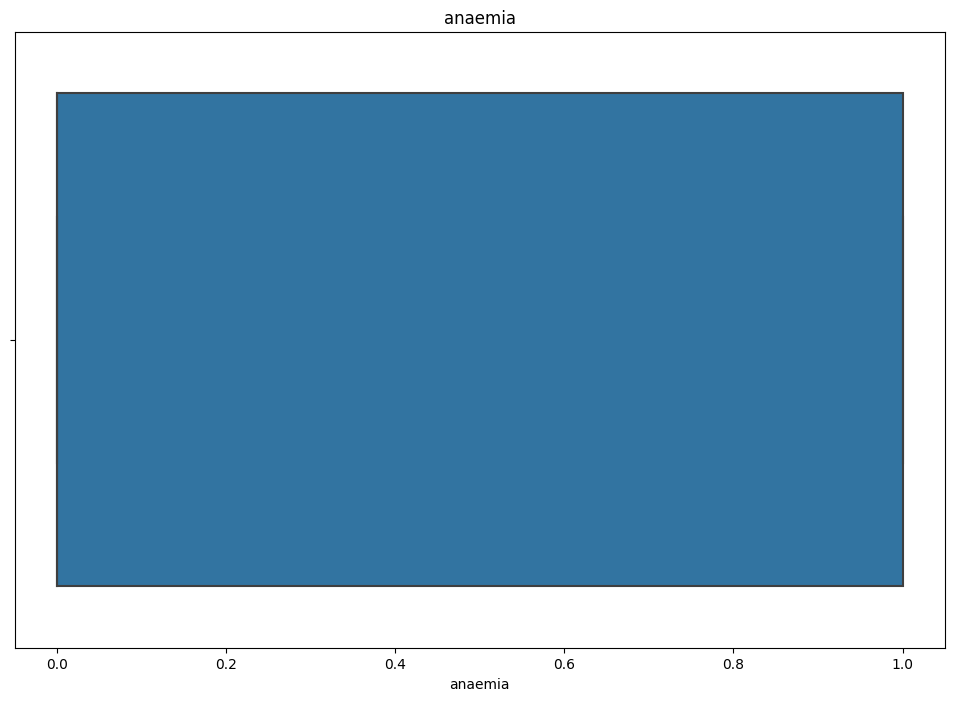

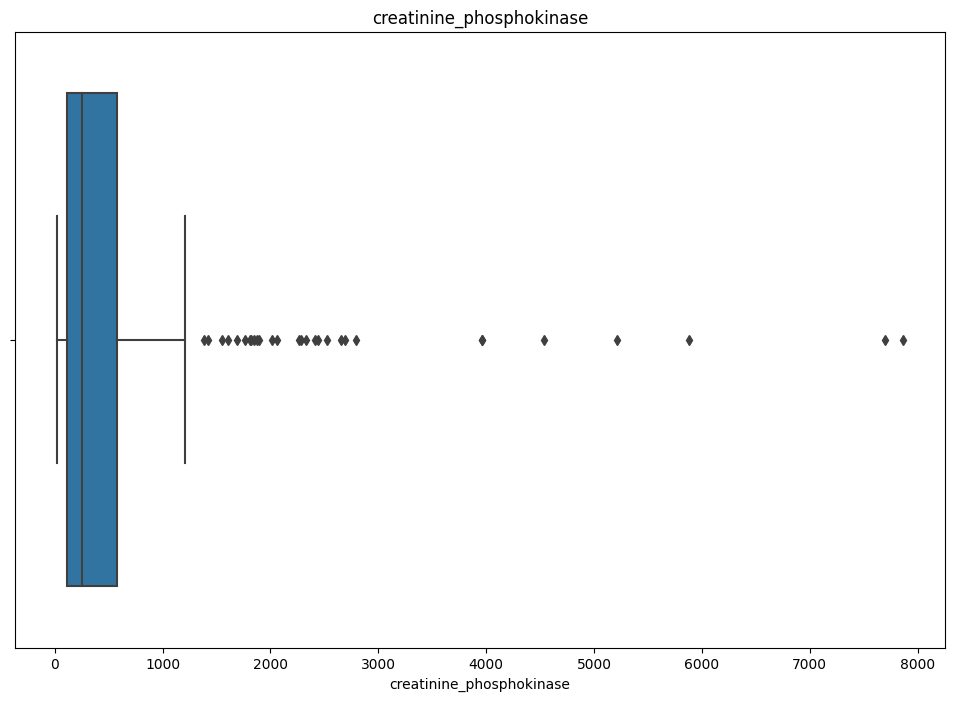

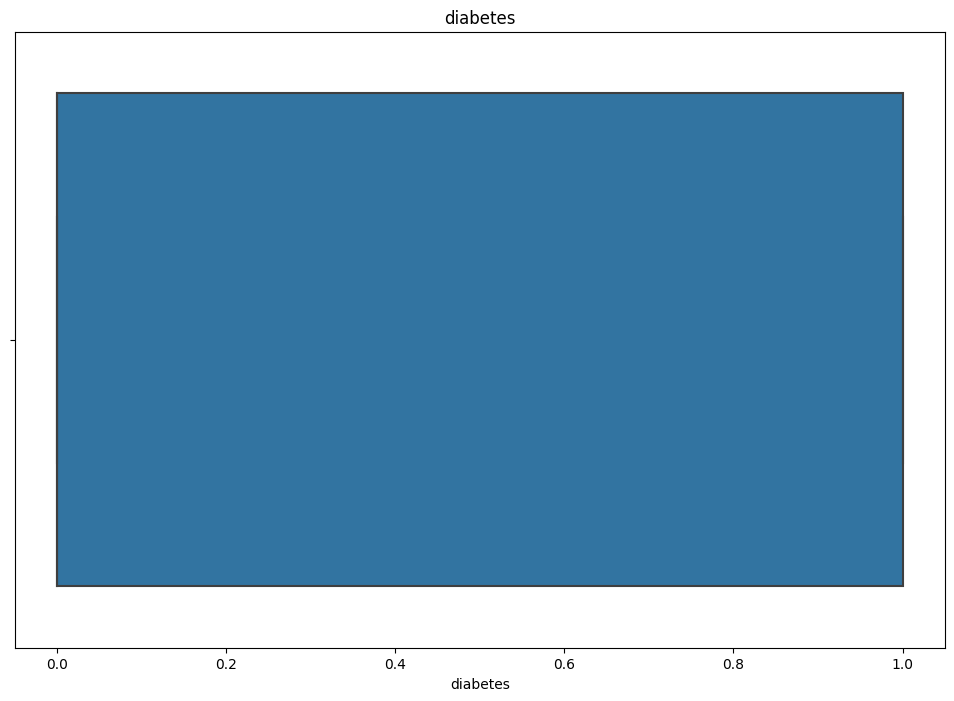

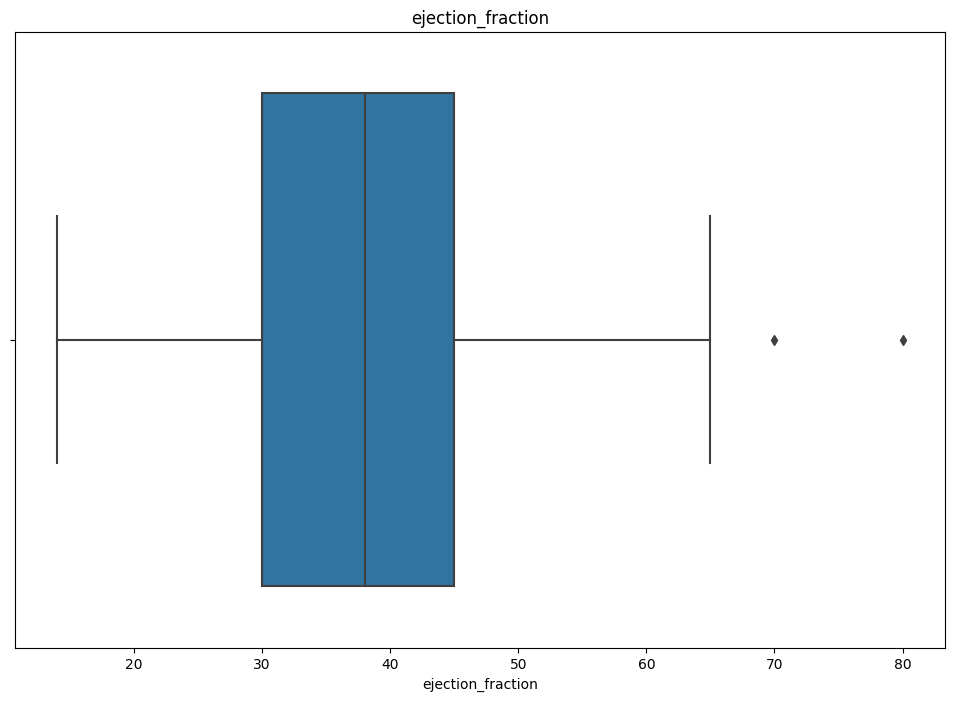

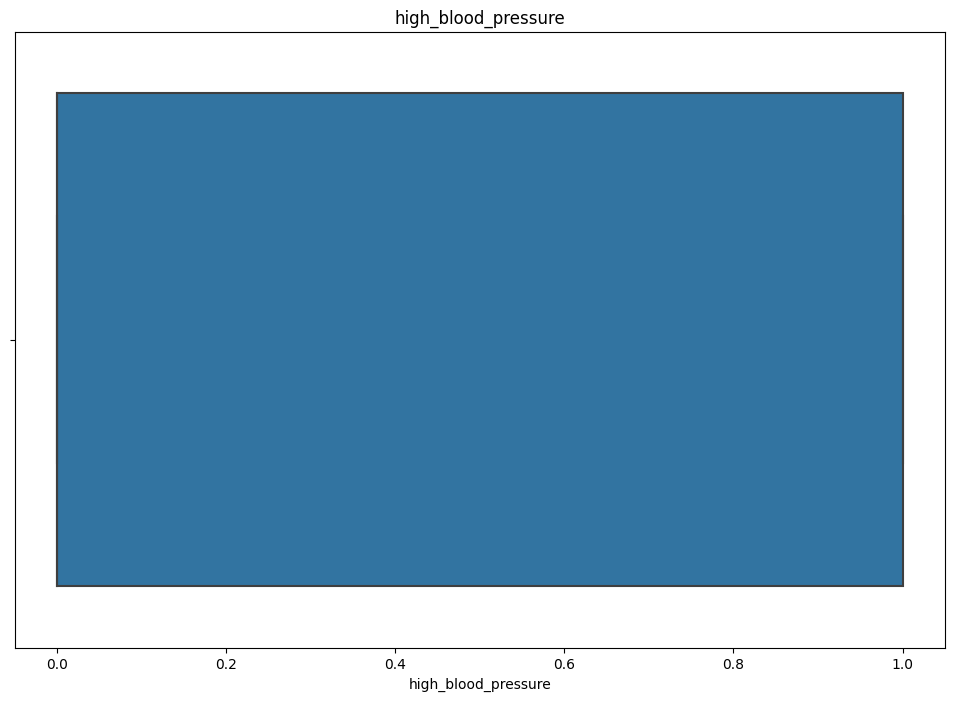

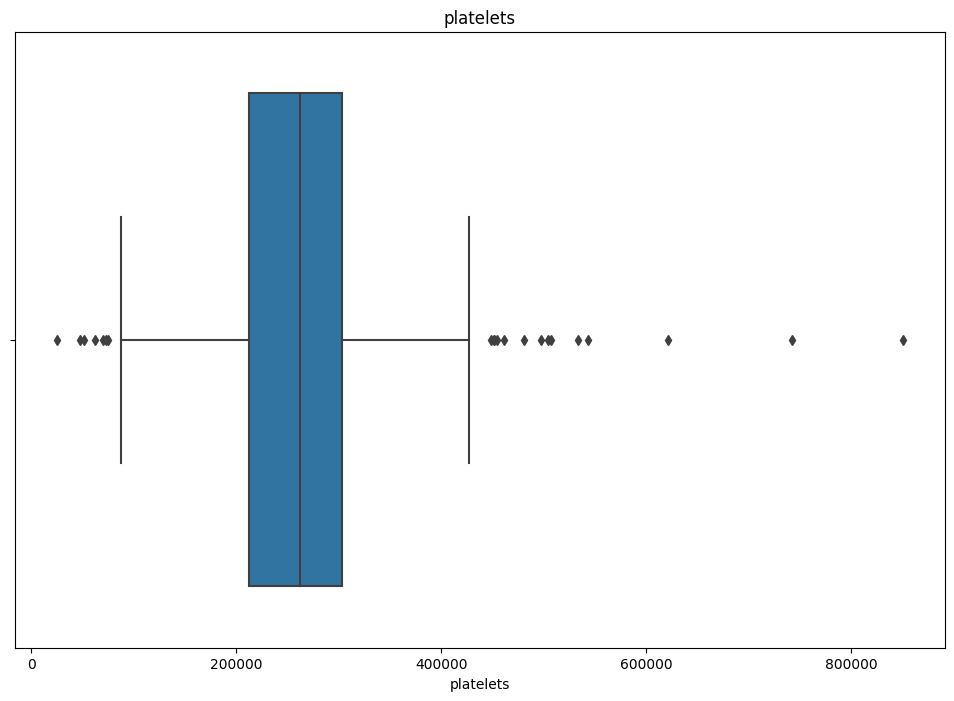

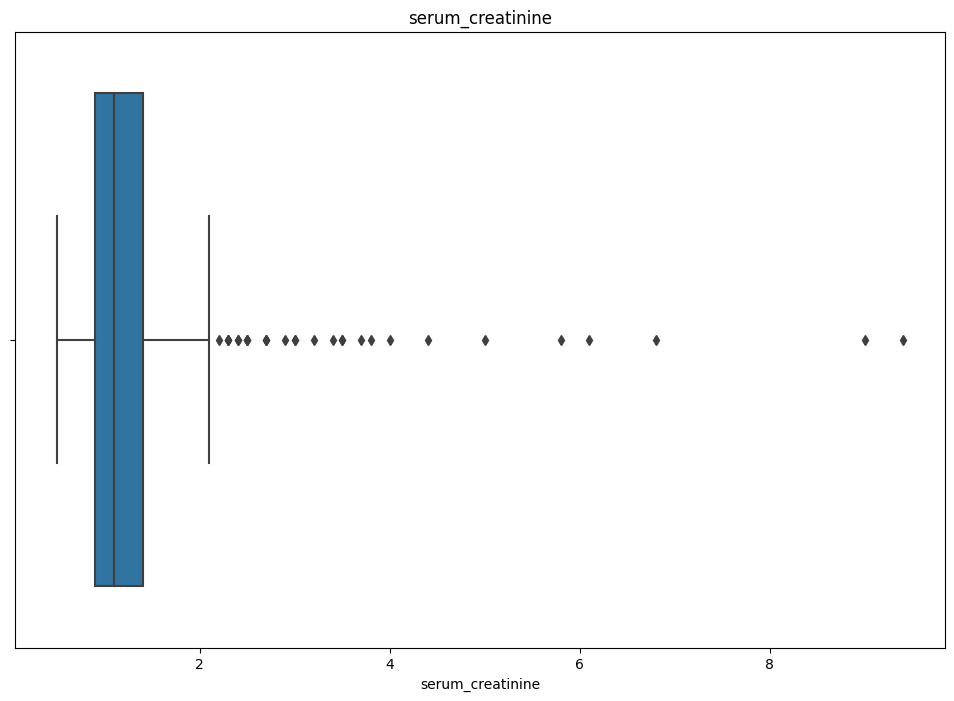

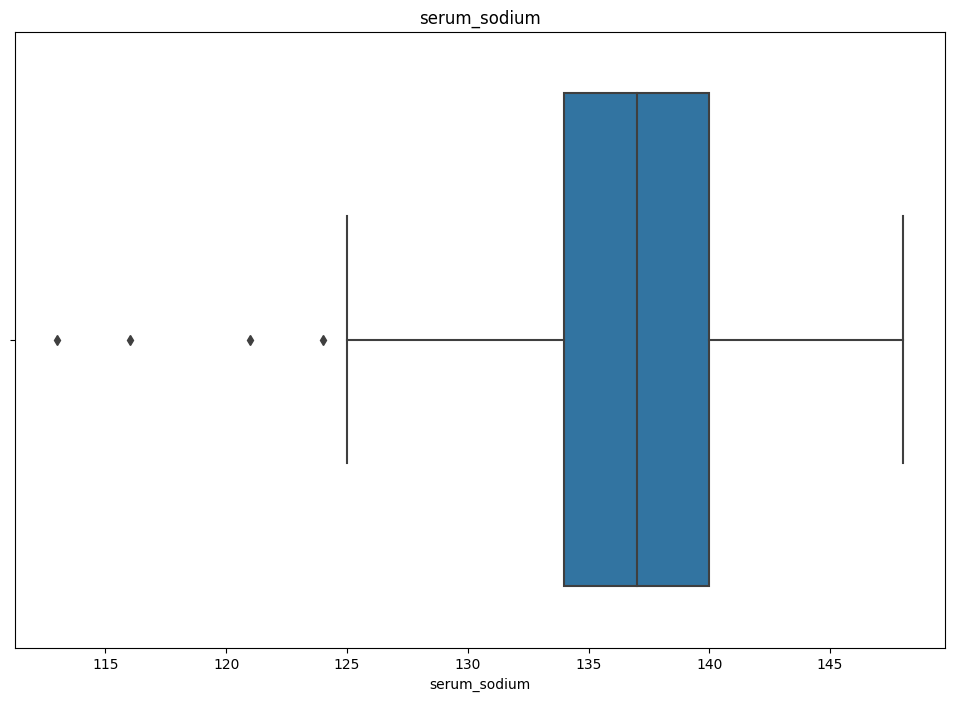

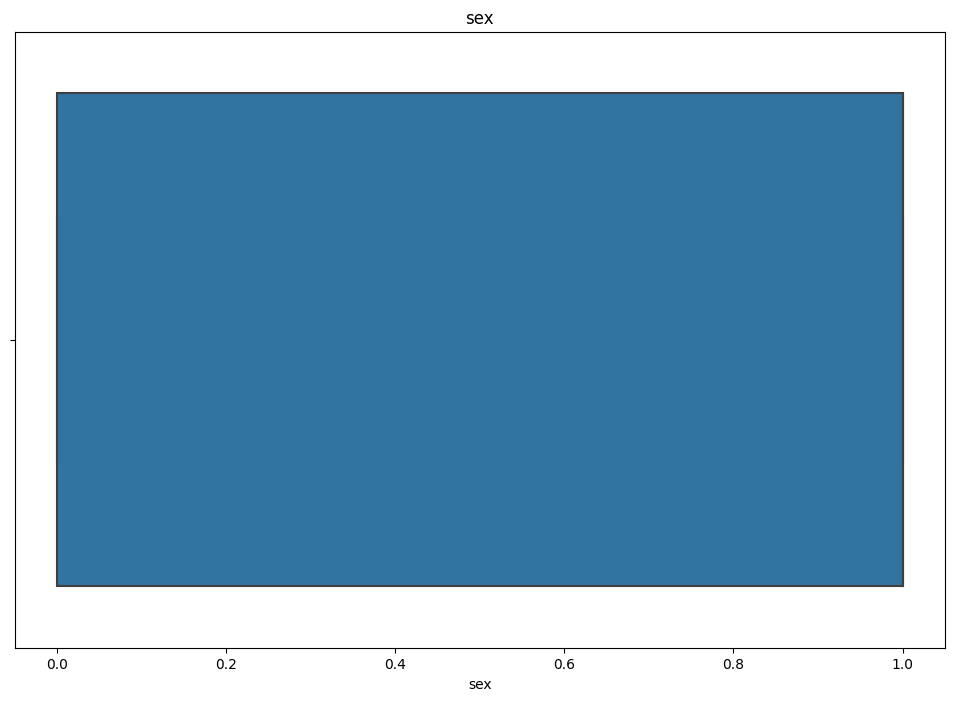

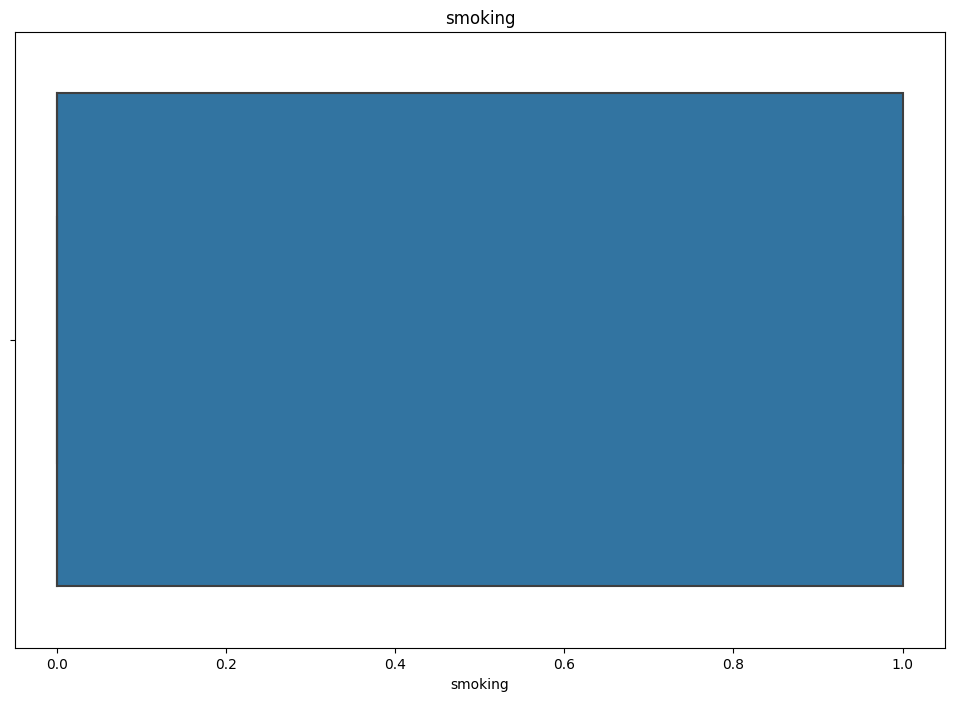

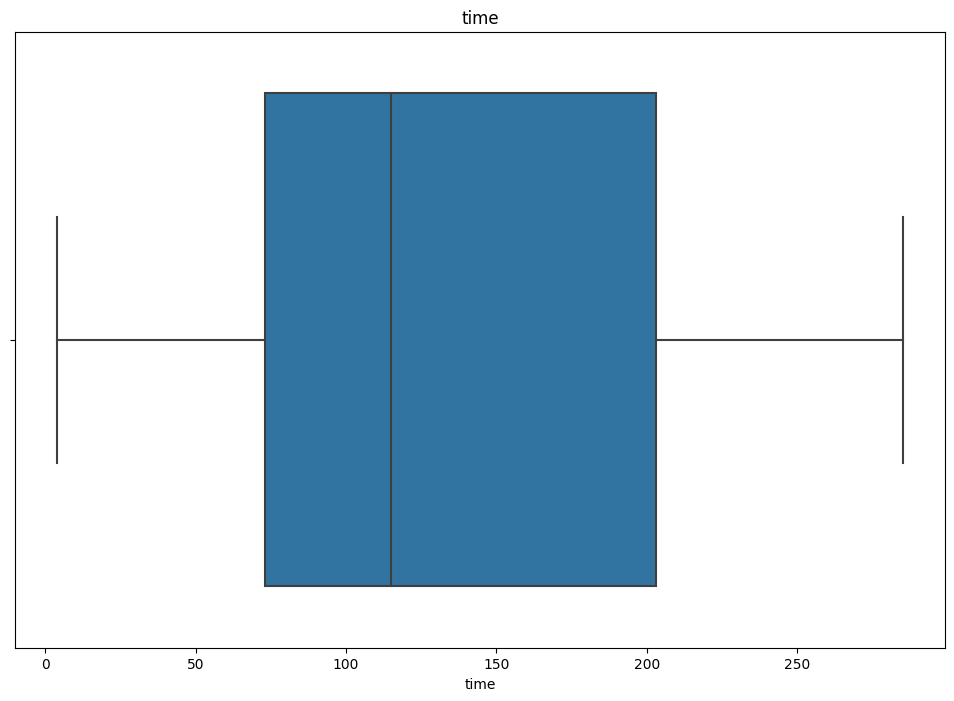

In [28]:
num = ['age','anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure',	'platelets', 'serum_creatinine','serum_sodium',	'sex', 'smoking', 'time']

for i in range(len(num)):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=num[i])
    plt.title(num[i])
    plt.show()

## Preprocessing

In [32]:
x = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [33]:
#or
x = df.iloc[ :, :-1]
y = df.iloc[ :, -1]

In [34]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=101)

## ML Algorithms

Logistic Regression

In [35]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [36]:
lr_model.score(x_train, y_train)

0.8158995815899581

In [37]:
y_pred = lr_model.predict(x_test)


In [38]:
print(accuracy_score(y_test, y_pred))

0.85


DT

In [51]:
model = DecisionTreeClassifier( max_depth=9,min_impurity_decrease=0.001)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_impurity_decrease=0.001)

In [52]:
model.score(x_train, y_train)

0.9916317991631799

In [53]:
y_pred = model.predict(x_test)

In [54]:
print(accuracy_score(y_test, y_pred))

0.8


RF

In [57]:
rf_model = RandomForestClassifier( n_estimators=200, min_impurity_decrease=0.001 )
rf_model.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.001, n_estimators=200)

In [58]:
rf_model.score(x_train, y_train)

0.99581589958159

In [59]:
y_pred=rf_model.predict(x_test)

In [60]:
print(accuracy_score(y_test, y_pred))

0.9


BaggingClassifier

In [61]:
bgg = BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)
bgg.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)

In [63]:
bgg.score(x_train, y_train)

0.8284518828451883

In [64]:
y_pred = bgg.predict(x_test)

In [65]:
print(accuracy_score(y_test, y_pred))

0.85


In [66]:
bgg_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=200, min_impurity_decrease=0.001), n_estimators=100)
bgg_model.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(min_impurity_decrease=0.001,
                                                   n_estimators=200),
                  n_estimators=100)

In [67]:
bgg_model.score(x_train, y_train)

0.9623430962343096

In [69]:
y_pred = bgg_model.predict(x_test)

In [70]:
print(accuracy_score(y_test, y_pred))

0.9166666666666666


ExtraTreesClassifier

In [71]:
exModel = ExtraTreesClassifier(n_estimators=100, min_impurity_decrease=0.001)
exModel.fit(x_train, y_train)

ExtraTreesClassifier(min_impurity_decrease=0.001)

In [72]:
exModel.score(x_train, y_train)

0.9539748953974896

In [73]:
y_pred = exModel.predict(x_test)

In [74]:
print(accuracy_score(y_test, y_pred))

0.8833333333333333


AdaBoostingClassifier

In [77]:
ada = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=300, min_impurity_decrease=0.001), n_estimators=30)
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(min_impurity_decrease=0.001,
                                                    n_estimators=200),
                   n_estimators=30)

In [78]:
ada.score(x_train, y_train)

1.0

In [79]:
y_pred = ada.predict(x_test)

In [80]:
print(accuracy_score(y_test, y_pred))

0.9166666666666666


XGBoostClassifier

In [82]:
xgb = XGBClassifier(n_estimators=1000, learning_rate= 0.001, verbosity=0)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
xgb.score(x_train, y_train)

0.9246861924686193

In [84]:
y_pred = xgb.predict(x_test)

In [85]:
print(accuracy_score(y_test, y_pred))

0.9


Lightgbm

In [86]:
lgbm = LGBMClassifier(n_estimators=350, learning_rate= 0.01)
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 81, number of negative: 158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.338912 -> initscore=-0.668146
[LightGBM] [Info] Start training from score -0.668146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.01, n_estimators=350)

In [88]:
lgbm.score(x_train, y_train)

0.9581589958158996

In [89]:
y_pred = lgbm.predict(x_test)

In [90]:
print(accuracy_score(y_test, y_pred))

0.8833333333333333
